In [25]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [26]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [27]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [28]:
mdltst=mdl[mdl['Server Name']=='CALBITST05']

<B>CALPBPRDTST CPU %<B>

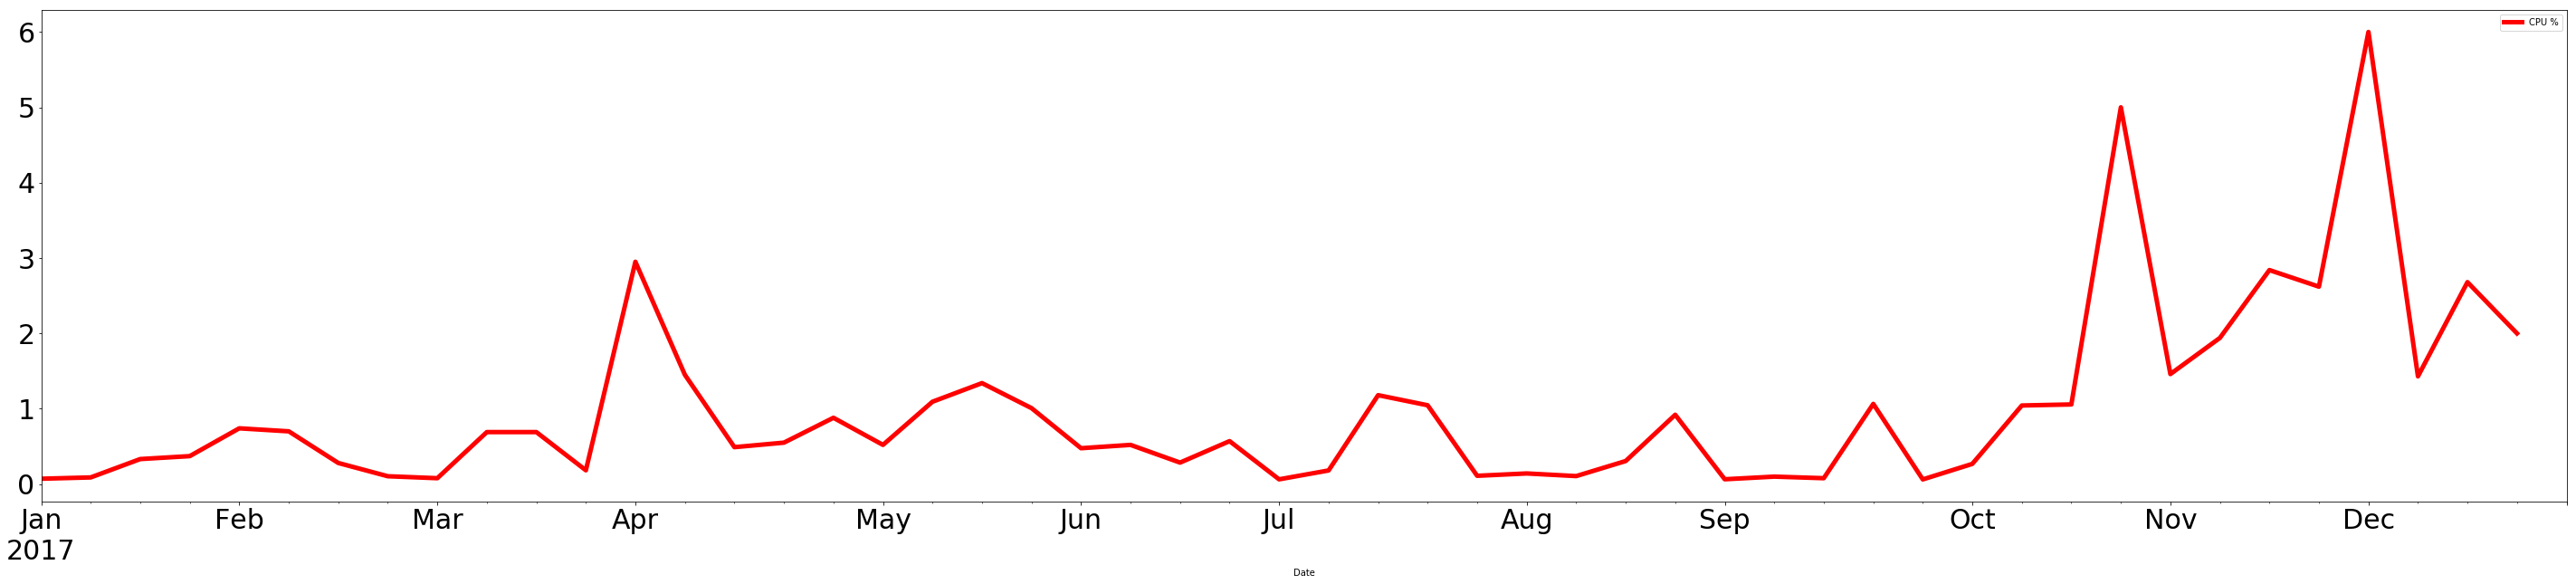

In [29]:
mdltst.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='CPU %', color ='red')

In [30]:
mdltst.set_index('Date', inplace=True)
mdltst['Month']= mdltst.index.month
mdltst['Day']=mdltst.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
mdltst.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBITST05,Wk 1,0.0710,26.5,1,7
2017-01-14,CALBITST05,Wk 2,0.0884,12.0,1,14
2017-01-21,CALBITST05,Wk 3,0.3320,12.0,1,21
2017-01-28,CALBITST05,Wk 4,0.3710,6.9,1,28
2017-02-04,CALBITST05,Wk 5,0.7400,8.3,2,4


<B>CALBIPRDTST CPU% (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


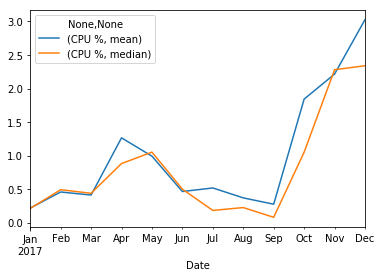

In [32]:
mdltst[['CPU %']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [33]:
print 'CALBIPRDTST CPU % Week Corr', mdltst['CPU %'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRDTST CPU % Month Corr', mdltst['CPU %'].resample('M').mean().autocorr(lag=1)

CALBIPRDTST CPU % Week Corr 0.422003535462
CALBIPRDTST CPU % Month Corr 0.746621211628


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [34]:
print 'diff(1) lag =1 :', mdltst['CPU %'].dropna().diff(1).dropna().autocorr(lag=1)
print 'lag =1 :', mdltst['CPU %'].dropna().autocorr(lag=1)
print 'lag =2 :', mdltst['CPU %'].dropna().autocorr(lag=2)
print 'lag =3 :', mdltst['CPU %'].dropna().autocorr(lag=3)
print 'lag =4 :', mdltst['CPU %'].dropna().autocorr(lag=4)
print 'lag =5 :', mdltst['CPU %'].dropna().autocorr(lag=5)
print 'lag =6 :', mdltst['CPU %'].dropna().autocorr(lag=6)
print 'lag =7 :', mdltst['CPU %'].dropna().autocorr(lag=7)
print 'lag =12 :', mdltst['CPU %'].dropna().autocorr(lag=12)
print 'lag =24 :', mdltst['CPU %'].dropna().autocorr(lag=24)
print 'lag =24 :', mdltst['CPU %'].dropna().autocorr(lag=34)

diff(1) lag =1 : -0.536727214728
lag =1 : 0.422003535462
lag =2 : 0.45138952904
lag =3 : 0.374504316662
lag =4 : 0.316896073622
lag =5 : 0.558777090699
lag =6 : 0.114553455214
lag =7 : 0.191782356829
lag =12 : -0.306649613318
lag =24 : -0.0215280389233
lag =24 : 0.318518191732


 <b> CALBITST05 CPU % Autocorrlation - Month Lag 1 to 11</b>

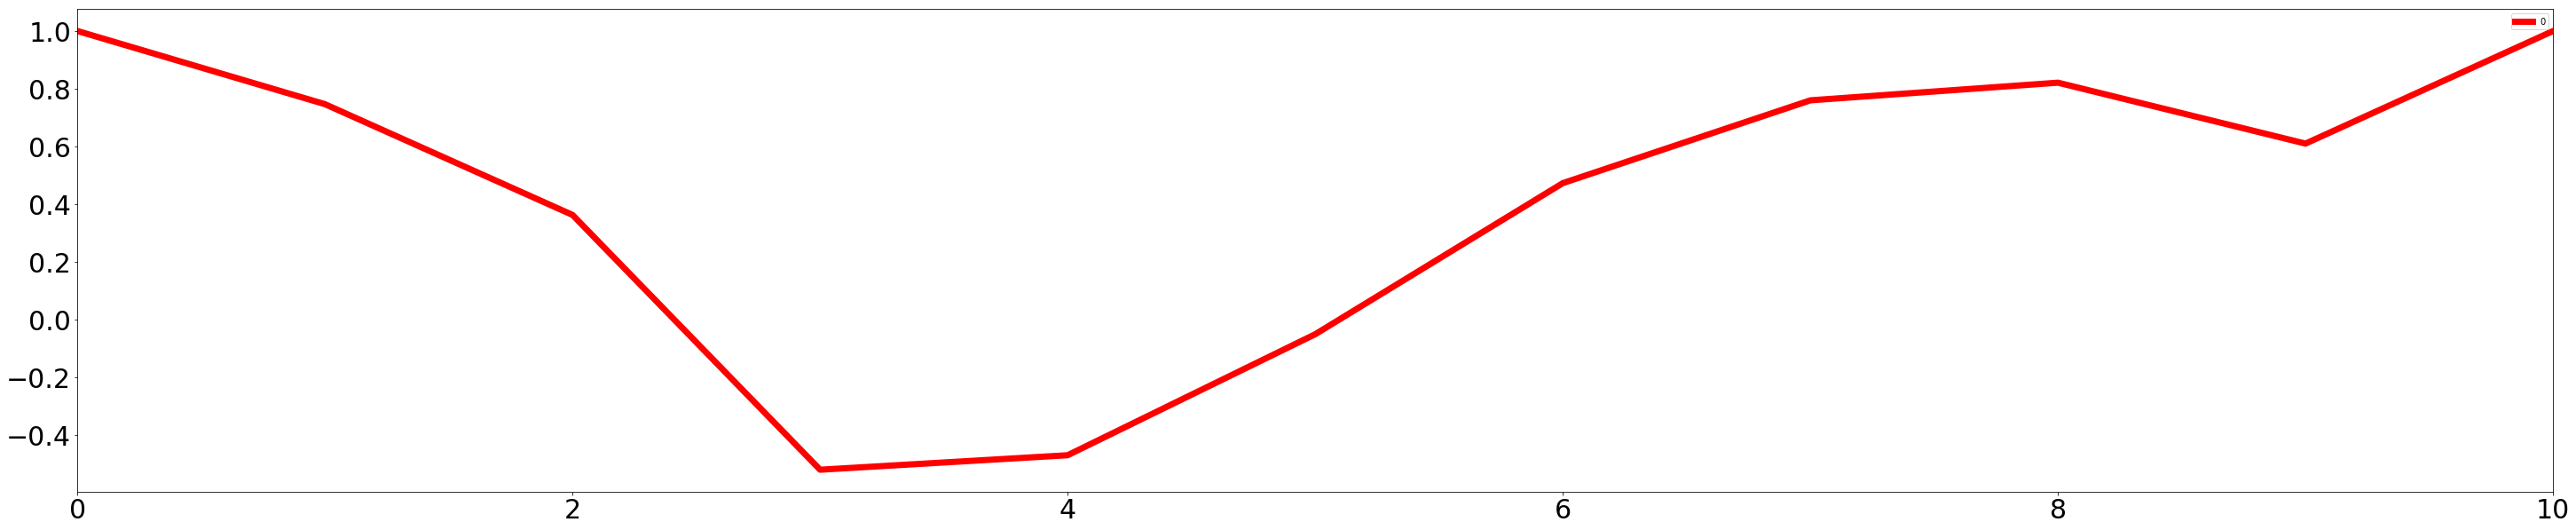

In [35]:
autoc = []

for i in range(11):
    autoc.append(mdltst['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

<b> CALBITST05 CPU % Autocorrlation - Week Lag 1 to 51</b>

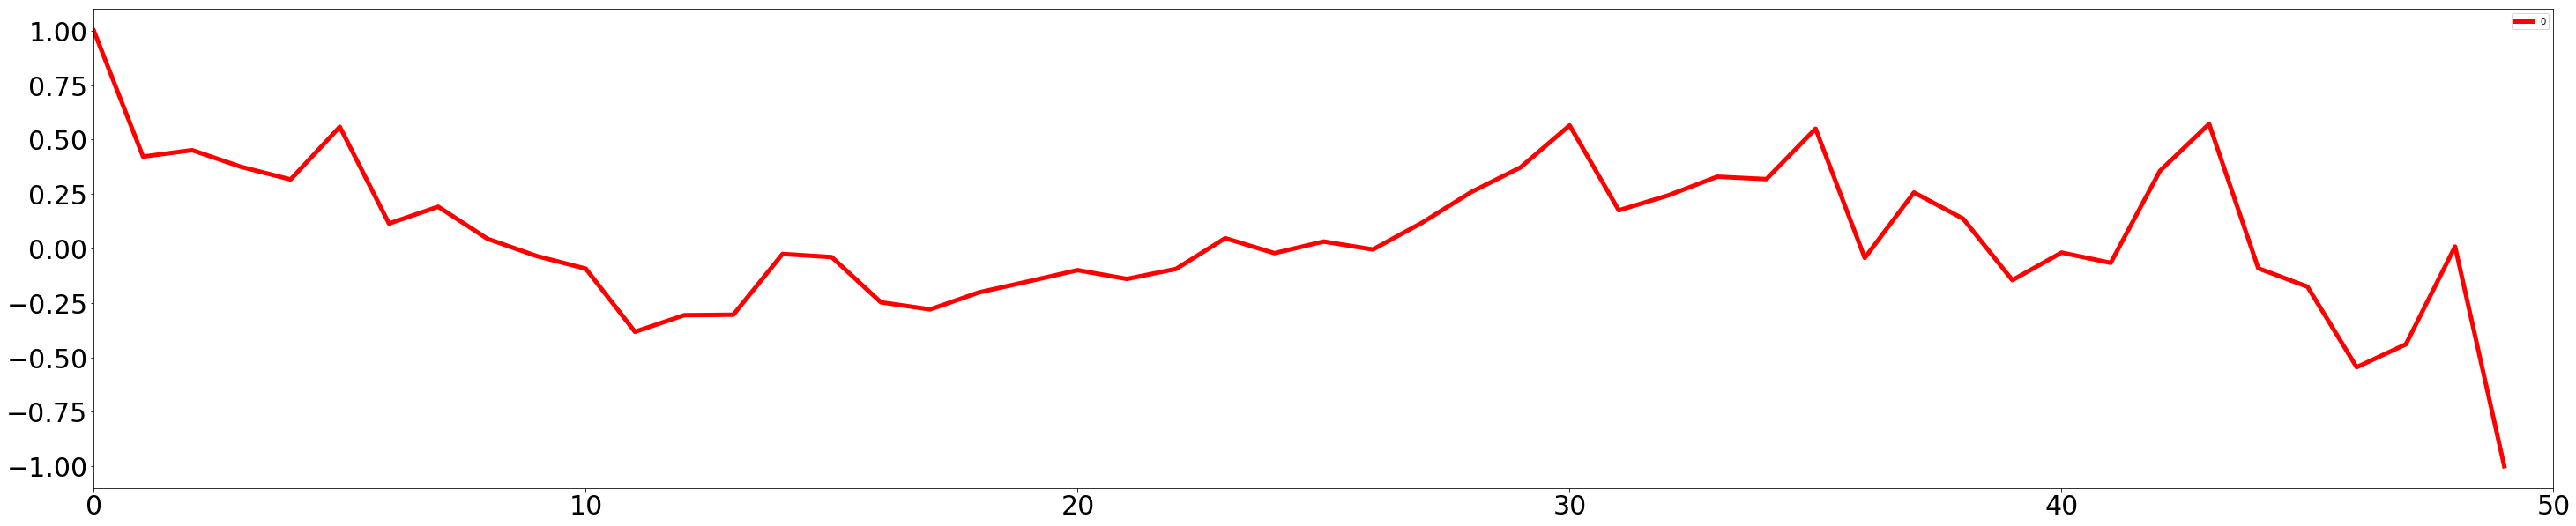

In [36]:
autoc = []

for i in range(51):
    autoc.append(mdltst['CPU %'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


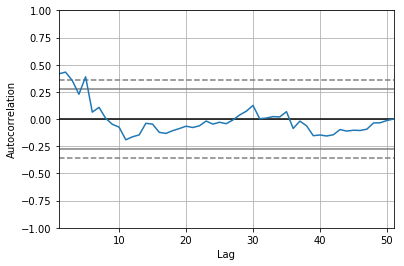

In [37]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdltst['CPU %'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

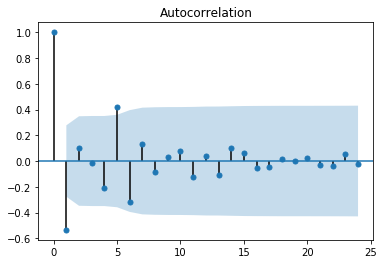

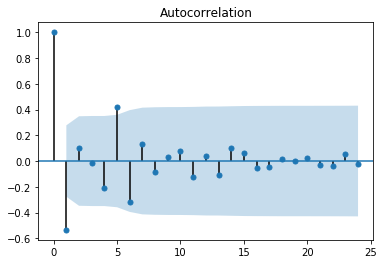

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdltst['CPU %'].dropna().diff(1).dropna(),lags=24) 
#plot_acf(mdltst['CPU %'].dropna(),lags=24) 

<b> Trend and Seasonality falls within confident intervel, so no need of calculating 'diff' </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation 0.422003535462 for lag 1 and falls not in intervel, NEED to use diff(1) </font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

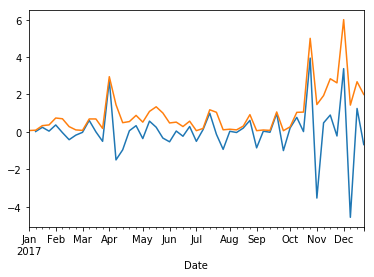

In [39]:
#mdl01['RAM'].dropna().plot()
mdltst['CPU %'].dropna().diff(1).dropna().plot()
mdltst['CPU %'].dropna().plot()

In [40]:
from statsmodels.tsa.arima_model import ARMA
mdlsqla = mdltst[['CPU %']].dropna().diff(1).dropna().astype(float)
#mdlsqla = mdltst[['CPU %']].dropna().astype(float)
modela = ARMA(mdlsqla, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 -75.107
Method:                       css-mle   S.D. of innovations              1.083
Date:                Sun, 07 Jan 2018   AIC                            156.213
Time:                        18:57:38   BIC                            161.949
Sample:                    01-14-2017   HQIC                           158.398
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0438      0.101      0.433      0.667      -0.154       0.242
ar.L1.CPU %    -0.5280      0.118     -4.486      0.000      -0.759      -0.297
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8941           +0.0000j            1.8941            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'CPU %' coef is 0.7486 which is high, so need to use 'diff' to make it stationary and <b>P value is > .0000</b> which is not significant.</br><b><font color ='red' ><br> 1. When diff =0 AR coef is .4188 and autocorrelation at lag 1 is 0.422003535462 and P 0.002 <.05</br> 
<br>2. When diff =1 AR coef is -0.5280 and autocorrelation at lag 1 with diff(1) is -0.536727214728 and P 0.000 <.05 </br> </font></b><b>5 th lag is out of range </b>

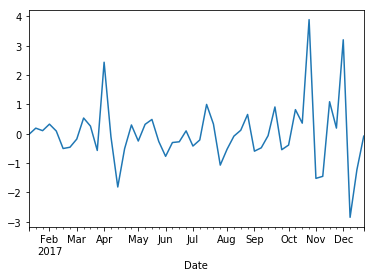

In [44]:
modela.resid.plot()

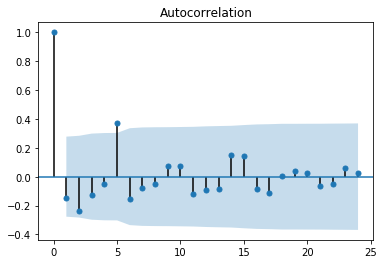

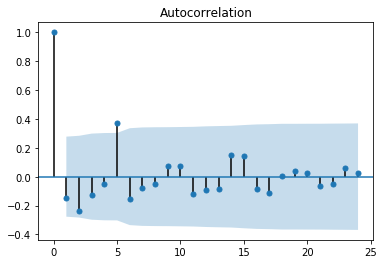

In [45]:
plot_acf(modela.resid, lags=24)

In [46]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [47]:
#mdlsqlm = mdlsql[['CPU %']].dropna().diff(1).dropna().astype(float)
mdltstm = mdltst[['CPU %']].dropna().astype(float)
modelm = ARMA(mdltstm, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                 -78.295
Method:                       css-mle   S.D. of innovations              1.122
Date:                Sun, 07 Jan 2018   AIC                            162.589
Time:                        19:01:58   BIC                            168.385
Sample:                    01-07-2017   HQIC                           164.804
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9834      0.200      4.920      0.000       0.592       1.375
ma.L1.CPU %     0.2772      0.114      2.430      0.019       0.054       0.501
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6081           +0.0000j            3.6081            0.5000
-----------------------------------------------------------------------------
"""

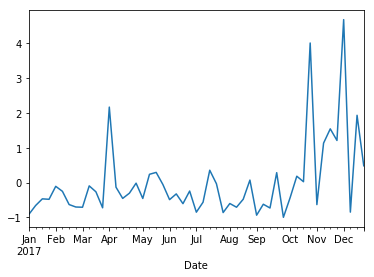

In [48]:
modelm.resid.plot()

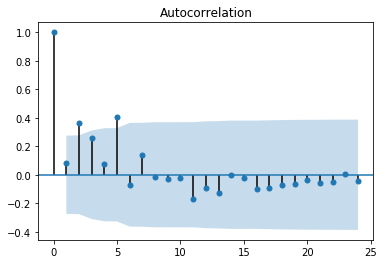

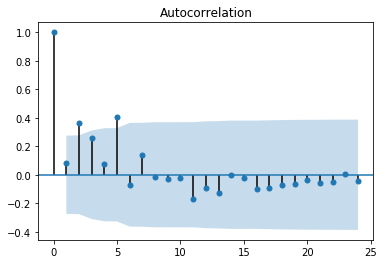

In [49]:
plot_acf(modelm.resid, lags=24)

<b>ARIMA</b>

In [51]:
from statsmodels.tsa.arima_model import ARIMA
mdltst = mdltst[['CPU %']].dropna().astype(float)
model = ARIMA(mdltst, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.CPU %   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -75.107
Method:                       css-mle   S.D. of innovations              1.083
Date:                Sun, 07 Jan 2018   AIC                            156.213
Time:                        19:02:27   BIC                            161.949
Sample:                    01-14-2017   HQIC                           158.398
                         - 12-23-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0438      0.101      0.433      0.667      -0.154       0.242
ar.L1.D.CPU %    -0.5280      0.118     -4.486      0.000      -0.759      -0.297
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8941           +0.0000j            1.8941            0.5000
-----------------------------------------------------------------------------
"""

In [52]:
#mdl05['CPU %'].dropna().diff(1).dropna().autocorr(1)
mdltst['CPU %'].dropna().autocorr(1)

0.42200353546155711

<b>Note:</b><font color ='red'><br>From ARIMA (1,1,0) coef is -0.5280 and P value is < .05 which is significant </br></font>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


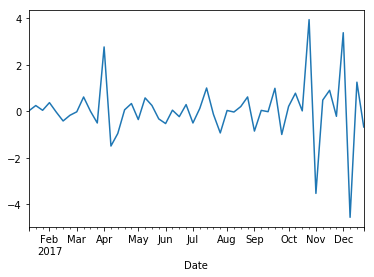

In [53]:
#model.resid.plot()
mdltst['CPU %'].dropna().diff(1).dropna().plot()

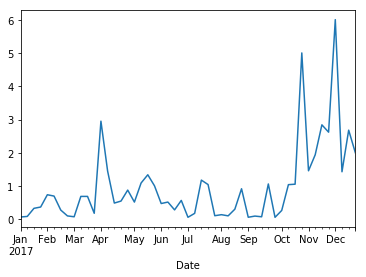

In [54]:
mdltst['CPU %'].dropna().plot()

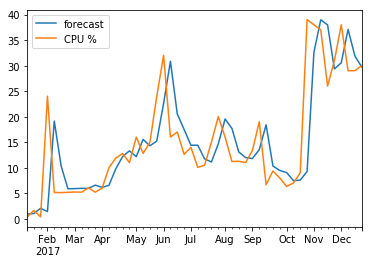

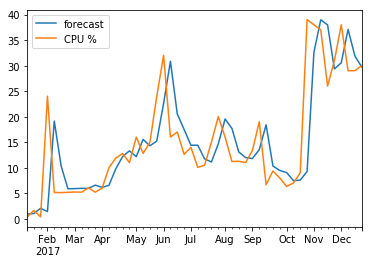

In [33]:
model.plot_predict(1, 50)

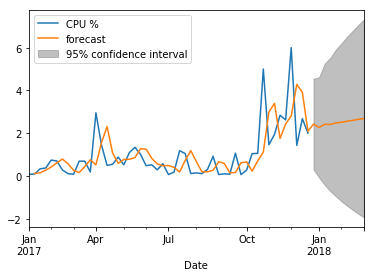

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdltst['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Ask 1 .why whehn difff(1) gives more inclient graph but not for AR(1) or ARIMA(1,0,0)
<br>2. When to use ARIMA(1,1,1) or ARIMA(0,1,1)</br>
<br>in graph whats the differece between 126 and 127</br></b>